### Correlation between off-target efficiencies and on-pred, off-pred 

In [1]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
## 基础模块 1
#####################################################################################
def is_Exist_file(path):
    import os
    if os.path.exists(path):
        os.remove(path)


def mkdir(path):
    import os
    path = path.strip()  # 去除首位空格
    path = path.rstrip("\\")  # 去除尾部 \ 符号
    isExists = os.path.exists(path)  # 判断路径是否存在
    # 判断结果
    if not isExists:
        os.makedirs(path)  # 如果不存在则创建目录
        print(path + ' 创建成功')
    else:
        print(path + ' 目录已存在') 

In [3]:
## correlation between off-target efficiencies and on, off-prediction efficiencies
def get_corr_data_between_ot_and_of(df):
    df1 = df.loc[df['core_mismatch_num']==1, :]
    df1.reset_index(drop=True, inplace=True)
    df1['X'] = df1['new_mutation'].apply(lambda x: x.split('+')[0])
    df1['Y'] = df1['new_mutation'].apply(lambda x: x.split('+')[1])
    df1['Z'] = df1['new_mutation'].apply(lambda x: x.split('+')[2])
    df1['Y_position'] = df1['Y'].apply(lambda x: x.split("_")[0])
    stat_dict = {"position": [], "substitution": [], "sgRNA_n": [], "pearson-on_pred": [], "spearman-on_pred": [], 
                "pearson-off_pred": [], "spearman-off_pred": []}
    for i in range(21, 44):
        pos = 'Y%s:%sM'%(i, i)
        temp = df1.loc[df1['Y_position']==pos, :]
        for tp in temp['Y'].unique():
            temp1 = temp.loc[temp['Y']==tp, :]
            on_pear = temp1['RW_off-target_eff'].corr(temp1['on_pred'], method='pearson')
            on_spear = temp1['RW_off-target_eff'].corr(temp1['on_pred'], method='spearman')
            off_pear = temp1['RW_off-target_eff'].corr(temp1['off_pred'], method='pearson')
            off_spear = temp1['RW_off-target_eff'].corr(temp1['off_pred'], method='spearman')
            sgRNA_n = len(list(temp1['sgRNA_name'].unique()))
            temp1_n = temp1.shape[0]
            stat_dict['position'].append(i)
            stat_dict['substitution'].append(tp)
            stat_dict['sgRNA_n'].append(sgRNA_n)
            stat_dict['pearson-on_pred'].append(on_pear)
            stat_dict['spearman-on_pred'].append(on_spear)
            stat_dict['pearson-off_pred'].append(off_pear)
            stat_dict['spearman-off_pred'].append(off_spear)
    ## DataFrame
    stat_data = pd.DataFrame(stat_dict)
    stat_data['substitution'] = stat_data['substitution'].apply(lambda x: x.split('_')[1])
    return stat_data


def compute_mismatch_num(seq1, seq2):
    mis_num = 0
    for i, nucle0 in enumerate(seq1):
        nucle1 = seq2[i]
        if nucle0 != nucle1:
            mis_num += 1
        else:
            pass
    return mis_num

In [4]:
## plot correlation
def plot_correlation_between_on_and_off(stat_data, save_dir, label='pearson-off_pred'):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # 设置默认绘图风格
    plt.style.use("seaborn-white")
    fig, ax = plt.subplots(1,1, figsize=(12, 6))

    label_dict = {'pearson-on_pred': 'Pearson correlation', 
                  'pearson-off_pred': 'Pearson correlation', 
                  'spearman-on_pred': 'Spearman correlation', 
                  'spearman-off_pred': 'Spearman correlation'}
    order = [i for i in range(21, 44)]
    ax = sns.boxplot(x='position', y=label, data=stat_data, width=0.4, color='white', 
                     fliersize=0.5, linewidth=0.5, order=order)
    ## 坐标轴不可见
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # # 添加分布散点图 boxplot with jitter
    # 通过stripplot添加分布散点图，jitter设置数据间距
    ax = sns.stripplot(x='position', y=label, hue='substitution', data=stat_data, 
                       jitter=0.1, size=3, order=order)
    ## xlabel, ylabel
    plt.ylabel(label_dict[label], fontsize=12, weight='bold')
    plt.xlabel("Target + PAM Position", fontsize=12, weight='bold')
    ## xticks
    xticks = list(range(1, 21, 1)) + ['N', 'G', 'G', '', '']
    plt.xticks(range(len(xticks)), xticks, fontsize=10, weight='bold')
    ## ylim
    plt.ylim(0, 1.)
    title = '%s between off-target efficiencies \nand on-target predicited efficiencies of target sequence'%(label_dict[label])
    plt.title(title, fontsize=12, weight='bold')
    savefig_path = save_dir + '/%s with off-target.%s'%(label, figsuplix)
    plt.savefig(savefig_path, dpi=300, bbox_inches = 'tight')
    plt.show()

In [7]:
main_path = "../../data"
os.chdir(main_path)

./pdf/off-target/Fig29-correlation between on-pred and off 目录已存在


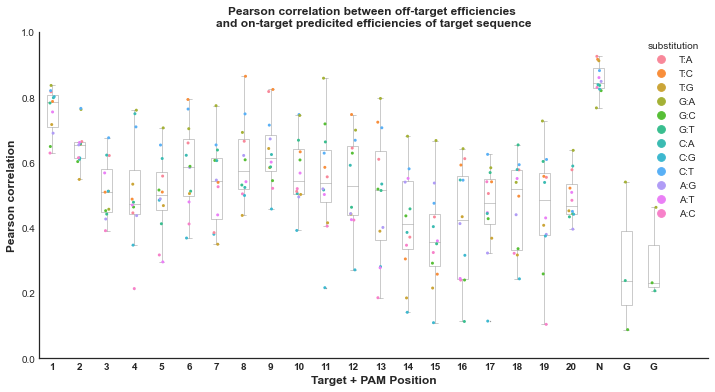

./pdf/off-target/Fig29-correlation between on-pred and off 目录已存在


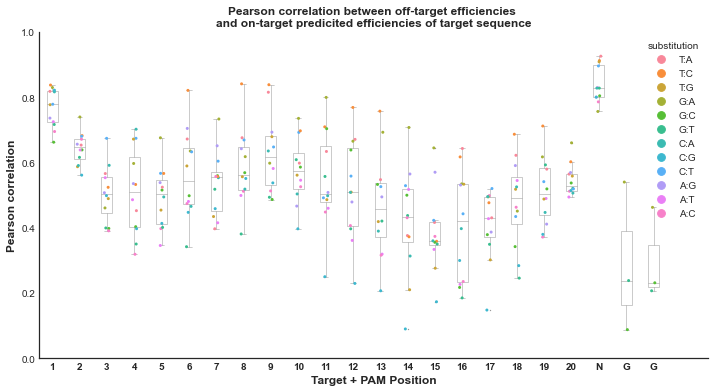

In [8]:
## Correlation between off-target efficiencies and on-pred, off-pred
data_dir = "./Off-Target/correlation between on-pred and off"
stat_data = pd.read_csv(data_dir + "/correlation between on-pred and off for anlysis of off-target.csv")

figsuplix = "pdf"
save_dir = './%s/off-target/Fig29-correlation between on-pred and off'%figsuplix
mkdir(save_dir)
## plot data 
label = 'pearson-off_pred'
plot_correlation_between_on_and_off(stat_data, save_dir, label)
## 
label = 'pearson-on_pred'
mkdir(save_dir)
plot_correlation_between_on_and_off(stat_data, save_dir, label)

### Feature importance of Elastic

In [9]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [10]:
## 基础模块 1
def is_Exist_file(path):
    import os
    if os.path.exists(path):
        os.remove(path)


def mkdir(path):
    import os
    path = path.strip()  # 去除首位空格
    path = path.rstrip("\\")  # 去除尾部 \ 符号
    isExists = os.path.exists(path)  # 判断路径是否存在
    # 判断结果
    if not isExists:
        os.makedirs(path)  # 如果不存在则创建目录
        print(path + ' 创建成功')
    else:
        print(path + ' 目录已存在')  # 如果目录存在则不创建，并提示目录已存在

In [11]:
def Note_off_target_all_PM():
    ## feature noting
    feat_dict = {}
    ## for offSeq feature
    c = 0
    for i in range(23):
        for nucle in ['A', 'G', 'C', 'T']:
            c += 1
            feat_dict['offSeq_%s'%(c)] = 'offSeq_%s%s'%(i + 1, nucle)
    ## for gRNASeq feature
    c = 0
    for i in range(23):
        for nucle in ['A', 'G', 'C', 'T']:
            c += 1
            feat_dict['gRNASeq_%s'%(c)] = 'gRNASeq_%s%s'%(i + 1, nucle)
    ## for PAM
    pam_feats = ['GG', 'AG', 'GT', 'GC', 'GA', 'TG', 'CG', 'other']
    for i, pam in enumerate(pam_feats):
        feat_dict['+P_%s'%(i+1)] = 'PAM-%s' % (pam)
    ## for mismatch_num feature
    feat_dict['mismatch_num_region_1'] = 'up_mismatch_number'
    feat_dict['mismatch_num_region_2'] = 'target_mismatch_number'
    feat_dict['mismatch_num_region_3'] = 'down_mismatch_number'
    ## for on-off predict feature
    feat_dict['pred_feat_1'] = 'on_pred_feat'
    feat_dict['pred_feat_2'] = 'off_pred_feat'
    ## for +mismatch feature
    align_order = ['AC', 'AG', 'AT', 'CA', 'CG', 'CT', 'GA', 'GC', 'GT', 'TA', 'TC', 'TG']
    c = 0
    for i in range(23):
        for one_p in align_order:
            c += 1
            feat_dict['+M_%s'%(c)] = 'mismatch_pt_%s%s'%(i + 1, one_p)
    return feat_dict

In [13]:
## 计算变异系数：coefficient of variation
def compute_coefficient_variation(data, col):
    f = data['f'].tolist()[0]
    if (f == 'mismatch_pt_22') or (f == 'mismatch_pt_23'):
        temp = data.loc[data[col]!=0, :]
    else:
        temp = data
    import numpy as np
    min_v = temp[col].min()
    array_0 = np.array(temp[col] + abs(min_v))
    cv = np.std(array_0, ddof=0)/np.mean(array_0)
    ## weight substract between max_v and min_v
    max_v = temp[col].max()
    data['coeff of variation'] = cv
    data['extreme diff'] = max_v - min_v
    data['max_abs'] = max([abs(max_v), abs(min_v)])
    return data


## get plot stat data
def get_plot_integrated_value(feat_data, elastic):
    elastic_importance = elastic.coef_
    ## 
    model_col = 'K562_Elastic_coef'
    feat_data[model_col] = elastic_importance
    feat_data['abs_elastic'] = feat_data[model_col].apply(lambda x: abs(x))
    feat_data['f'] = feat_data['feat_label'].apply(lambda x: "_".join(x.split("_")[:-1]))
    ## for mismatch position AND type
    ##########################################
    ## compute_coefficient_variation
    mdata = feat_data.loc[feat_data['f']=='mismatch_pt', :]
    mdata['f'] = mdata['feat_label'].apply(lambda x: x[:-2])
    sdata = mdata.groupby('f').apply(lambda data: compute_coefficient_variation(data, model_col))
    print(sdata.shape)
    ##  计算 integrated_value
    sdata = sdata[['f', 'coeff of variation', 'extreme diff', 'max_abs']]
    sdata.drop_duplicates(inplace=True)
    sdata['x'] = sdata['f'].apply(lambda x: int(x.split("_")[-1]))
    sdata.sort_values(by='x', ascending=True, inplace=True)
    sdata['integrated_value'] = sdata.apply(lambda row: row['max_abs']*row['coeff of variation'], axis=1)
    return feat_data, sdata


## plot Weight_Difference
## For 每个位置的权重差
def plot_weight_difference(sdata, save_dir, model_col='K562_Elastic_coef'):
    import numpy as np
    import matplotlib.pyplot as plt 

    plt.figure(figsize=(8,4))
    xticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 'N', 'G', 'G']

    plt.plot(sdata['x'].tolist(), sdata['extreme diff'].tolist(), 'o-', color='g', label="weight diff") # o-:圆形
    plt.xticks(np.array(range(23)) + 1, xticks, weight='bold')
    plt.xlabel("Mismatch Position", weight='bold')#横坐标名字
    plt.ylabel("Weight Difference", weight='bold')#纵坐标名字
    # plt.legend(loc = "best")#图例
    savefig_path = save_dir + '/%s_feature_importance_for_K562_all+P+M_by_Weight_Diff.%s'%(model_col, figsuplix)
    plt.savefig(savefig_path, dpi=300, bbox_inches = 'tight')
    plt.show()
    
    
##
## For 每个位置的变异系数
def plot_coefficient_of_variation(sdata, save_dir, model_col='K562_Elastic_coef'):
    import numpy as np
    import matplotlib.pyplot as plt 

    plt.figure(figsize=(8,4))
    xticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 'N', 'G', 'G']

    plt.plot(sdata['x'].tolist(), sdata['coeff of variation'].tolist(), 'o-', color='g', label="weight diff") # o-:圆形
    plt.xticks(np.array(range(23)) + 1, xticks, weight='bold')
    plt.xlabel("Mismatch Position", weight='bold')#横坐标名字
    plt.ylabel("Coefficient of variation", weight='bold')#纵坐标名字
    # plt.legend(loc = "best")#图例
    savefig_path = save_dir + '/%s_feature_importance_for_K562_all+M_by_Coefficient_of_Variation.%s'%(model_col, figsuplix)
    plt.savefig(savefig_path, dpi=300, bbox_inches = 'tight')
    plt.show()
    
    
## 
## For 每个位置的最大权重值
def plot_max_weight(sdata, save_dir, model_col='K562_Elastic_coef'):
    import numpy as np
    import matplotlib.pyplot as plt 

    plt.figure(figsize=(8,4))
    xticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 'N', 'G', 'G']

    plt.plot(sdata['x'].tolist(), sdata['max_abs'].tolist(), 's-', color='r', label="weight diff") # o-:圆形
    plt.xticks(np.array(range(23)) + 1, xticks, weight='bold')
    plt.xlabel("Mismatch Position", weight='bold')
    plt.ylabel("Max weigth absolute value", weight='bold')
    savefig_path = save_dir + '/%s_feature_importance_for_K562_all+P+M_by_Max_Weight.%s'%(model_col, figsuplix)
    plt.savefig(savefig_path, dpi=300, bbox_inches = 'tight')
    plt.show()
    
    
##
## 整合 weigth value & coefficient of variation
def plot_integrated_value(sdata, save_dir, model_col='K562_Elastic_coef'):
    import numpy as np
    import matplotlib.pyplot as plt 

    plt.figure(figsize=(8,4))
    xticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 'N', 'G', 'G']

    plt.plot(sdata['x'].tolist(), sdata['integrated_value'].tolist(), 's-', color='b', label="weight diff") # o-:圆形
    # plt.hlines(0.01, 0, 23)
    plt.xticks(np.array(range(23)) + 1, xticks, weight='bold')
    plt.xlabel("Mismatch Position", weight='bold')#横坐标名字
    plt.ylabel("Integrated value \n(weigth * coefficient of variation)", weight='bold')
    savefig_path = save_dir + '/%s_feature_importance_for_K562_all+P+M_by_Integrated_value.%s'%(model_col, figsuplix)
    plt.savefig(savefig_path, dpi=300, bbox_inches = 'tight')
    plt.show()

(276, 8)
./pdf/off-target/Fig31-32-integrated value 目录已存在


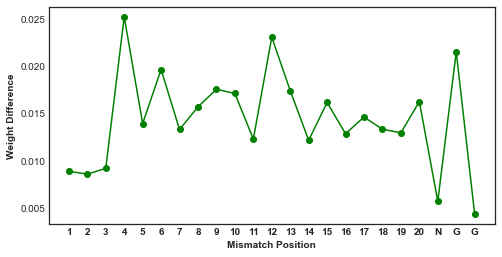

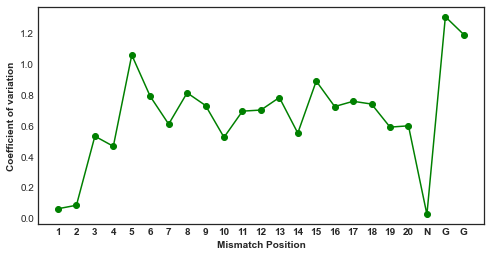

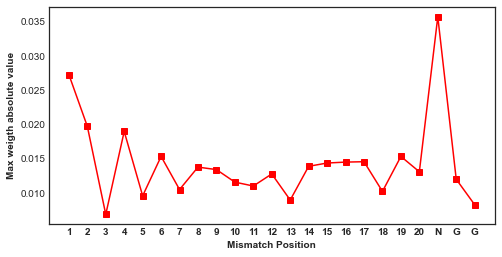

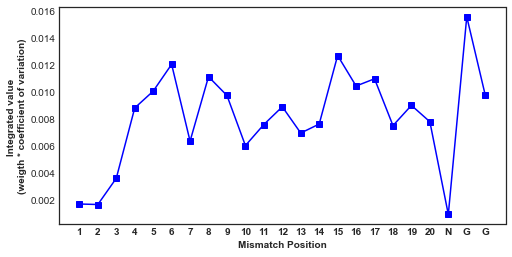

In [14]:
## feature noting
feat_data = pd.read_excel('./Off-Target/Feature_importance/feature_noting.xlsx')
import joblib
elastic_model_path = './Off-Target/Feature_importance/K562-200_Elastic-all+P+M_count-24.model'
elastic = joblib.load(elastic_model_path)
## get plot data
feat_data, sdata = get_plot_integrated_value(feat_data, elastic)

## plot
model_col = 'K562_Elastic_coef'
# save_dir = './Feature_importance'
save_dir = './%s/off-target/Fig31-32-integrated value'%figsuplix
mkdir(save_dir)
## For 每个位置的权重差
plot_weight_difference(sdata, save_dir, model_col)
## For 每个位置的变异系数
plot_coefficient_of_variation(sdata, save_dir, model_col)
## For 每个位置的最大权重值
plot_max_weight(sdata, save_dir, model_col)
## 整合 weigth value & coefficient of variation
plot_integrated_value(sdata, save_dir, model_col)